In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def function(x):
    a = 1.01
    b = -3.04
    c = 2.07
    return a*x**2 + b*x + c

In [3]:
def check_initial_values(f, x_min, x_max, tol):
    
    y_min = f(x_min)
    y_max = f(x_max)
    
    if(y_min * y_max > 0.0):
        s = "No zero crossing round in this range = x:[%f,%f]" % (x_min, x_max)
        print(s)
        s = "f(%f) = %f, f(%f) = %f" % (x_min, y_min, x_max, y_max)
        print(s)
        return 0
    
    if(np.fabs(y_min)<tol):
        return 1
    
    if(np.fabs(y_max)<tol):
        return 2
    
    return 3

In [4]:
def bisection_root_finding(f, x_min_start, x_max_start, tol):
    
    x_min = x_min_start
    x_max = x_max_start
    x_mid = 0.0
    
    y_min = f(x_min)
    y_max = f(x_max)
    y_mid = 0.0
    
    imax = 100000
    i = 0
    
    flag = check_initial_values(f, x_min, x_max, tol)
    if(flag==0):
        print("Error in bisection_root_finding")
        raise ValueError("Initial values invalid", x_min, x_max)
    elif(flag==1):
        return x_min
    elif(flag==2):

        return x_max
    
    flag = 1
    
    
    while(flag):
        
        x_mid = 0.5 * (x_min + x_max)
        y_mid = f(x_mid)
        
        if(np.fabs(y_mid)<tol):
            flag = 0
            
        else:
            
            if(f(x_min) * f(x_mid) > 0):
                
                x_min = x_mid
            
            else:
                
                x_max = x_mid
        
#        print(x_min, f(x_min), x_max, f(x_max))
        
        i += 1
        
        if(i>=imax):
            print("Exceeded max number of iterations =", i)
            s = "Min bracket f(%f) = %15.4e" % (x_min, f(x_min))
            print(s)
            s = "Min bracket f(%f) = %15.4e" % (x_max, f(x_max))
            print(s)
            s = "Min bracket f(%f) = %15.4e" % (x_mid, f(x_mid))
            print(s)
            raise StopIteration("Stopping iterations after ",i)
    
    
    return x_mid, i, x_min_start, x_max_start

In [5]:
x_min = 0.4
x_max = 1.2

tolerance = 1.0e-6

print(x_min,function(x_min))
print(x_max,function(x_max))

x_root1 = bisection_root_finding(function, x_min, x_max, tolerance)[0]

i1 = bisection_root_finding(function, x_min, x_max, tolerance)[1]

y_root1 = function(x_root1)

s1 = "Root found with y(%f) = %f after %i iterations." % (x_root1, y_root1, i1)
print(s1)

x_min1 = bisection_root_finding(function, x_min, x_max, tolerance)[2]
x_max1 = bisection_root_finding(function, x_min, x_max, tolerance)[3]

0.4 1.0155999999999996
1.2 -0.12360000000000015
Root found with y(1.040869) = 0.000000 after 14 iterations.


In [6]:
x_min = 1.7
x_max = 2.4

tolerance = 1.0e-6

print(x_min,function(x_min))
print(x_max,function(x_max))

x_root2 = bisection_root_finding(function, x_min, x_max, tolerance)[0]

i2 = bisection_root_finding(function, x_min, x_max, tolerance)[1]

y_root2 = function(x_root2)

s2 = "Root found with y(%f) = %f after %i iterations." % (x_root2, y_root2, i2)
print(s2)

x_min2 = bisection_root_finding(function, x_min, x_max, tolerance)[2]
x_max2 = bisection_root_finding(function, x_min, x_max, tolerance)[3]

1.7 -0.17910000000000048
2.4 0.5916000000000001
Root found with y(1.969032) = 0.000000 after 17 iterations.


In [7]:
print(s1)
print(s2)

Root found with y(1.040869) = 0.000000 after 14 iterations.
Root found with y(1.969032) = 0.000000 after 17 iterations.


The bracketing ranges are x:[0,1] and x:[1,2]
Root found with y(1.040869) = 0.000000 after 14 iterations. Root found with y(1.969032) = 0.000000 after 17 iterations.


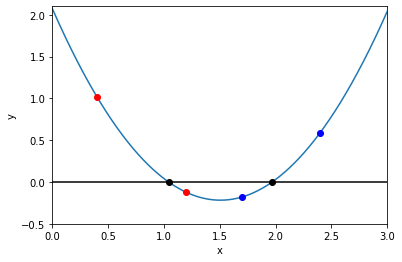

In [8]:
x = np.linspace(0, 3, 1000)
y = function(x)
y2 = 0 * x

plt.plot(x, y, label='f(x)')
plt.plot(x, y2, color='black')

plt.plot(x_root1, y_root1, 'o', color='#000000')
plt.plot(x_root2, y_root2, 'o', color='#000000')

plt.plot(x_min1, function(x_min1), 'o', color='#FF0000')
plt.plot(x_max1, function(x_max1), 'o', color='#FF0000')

plt.plot(x_min2, function(x_min2), 'o', color='#0000FF')
plt.plot(x_max2, function(x_max2), 'o', color='#0000FF')

plt.xlabel('x')
plt.ylabel('y')

plt.xlim(0, 3)
plt.ylim(-0.5, 2.1)

s = "The bracketing ranges are x:[%i,%i] and x:[%i,%i]" %(x_min1, x_max1, x_min2, x_max2)
print(s)
print(s1, s2)